# Stock Market Analysis Project


## Part 0: Import

** Import the various libraries you will need-you can always just come back up here or import as you go along :) **

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

____
## Part 1: Getting the Data

### Tesla Stock (Ticker: TSLA on the NASDAQ)





In [4]:
import pandas_datareader
import datetime

In [5]:
import pandas_datareader.data as web

In [6]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2019,2,1)
tesla = web.DataReader('TSLA', 'yahoo', start, end)

In [7]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000


In [8]:
tesla.to_csv('Tesla_Stock.csv')

### Other Car Companies

** Repeat the same steps to grab data for Ford and GM (General Motors), **

In [9]:
ford = web.DataReader('FORD', 'yahoo', start, end)
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,1.70,1.65,1.69,1.67,16700,1.67
2012-01-04,1.71,1.65,1.68,1.66,5600,1.66
2012-01-05,1.69,1.65,1.65,1.67,9200,1.67
2012-01-06,1.69,1.66,1.68,1.67,9800,1.67
2012-01-09,1.75,1.68,1.72,1.75,34500,1.75


In [10]:
gm = web.DataReader('GM', 'yahoo', start, end)
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.818344
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.898247
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.713190
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,18.312424
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,18.248503


## Part 2: Visualizing the Data

** Time to visualize the data. **

** Follow along and recreate the plots below according to the instructions and explanations. **

____

** Recreate this linear plot of all the stocks' Open price ! Hint: For the legend, use label parameter and plt.legend()**

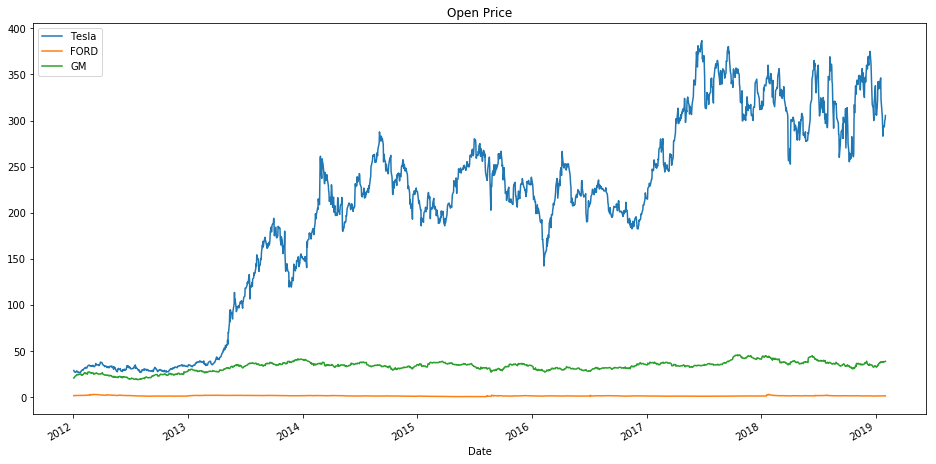

In [11]:
# Plot based on opening prices
tesla['Open'].plot(label='Tesla', figsize=(16,8), title='Open Price')
ford['Open'].plot(label='FORD')
gm['Open'].plot(label='GM')
plt.legend(); 

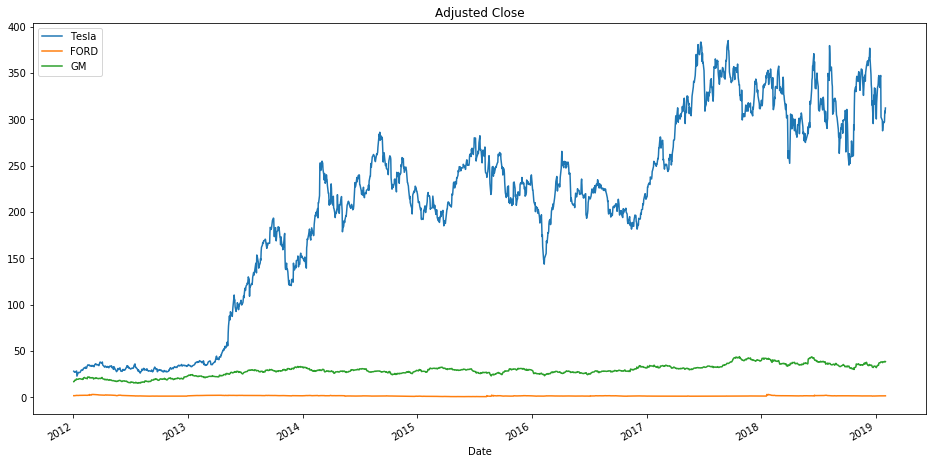

In [12]:
# Plot based on Adjusted closing prices
tesla['Adj Close'].plot(label='Tesla', figsize=(16,8), title='Adjusted Close')
ford['Adj Close'].plot(label='FORD')
gm['Adj Close'].plot(label='GM')
plt.legend(); 

____

** Plot the Volume of stock traded each day.**

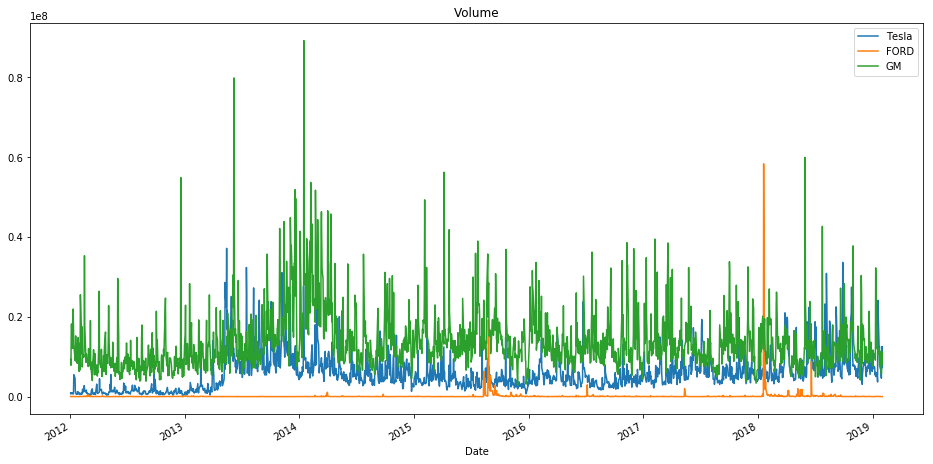

In [13]:
# daily volume
tesla['Volume'].plot(label='Tesla', figsize=(16,8), title='Volume')
ford['Volume'].plot(label='FORD')
gm['Volume'].plot(label='GM')
plt.legend(); 

** What are the dates of maximum trading volumes for each?**



In [14]:
ford['Volume'].idxmax()

Timestamp('2018-01-19 00:00:00')

In [15]:
gm['Volume'].idxmax()

Timestamp('2014-01-15 00:00:00')

In [16]:
tesla['Volume'].idxmax()

Timestamp('2013-05-14 00:00:00')

____

** The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at \$10 each versus 100000 units of stock at $1 each)**

** Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.**

In [17]:
# dollars traded for the day 
tesla['Total Traded'] = tesla['Open'] * tesla['Volume']
ford['Total Traded'] = ford['Open'] * ford['Volume']
gm['Total Traded'] = gm['Open'] * gm['Volume']

** Plot this "Total Traded" against the time index.**

Text(0,0.5,'Total Traded')

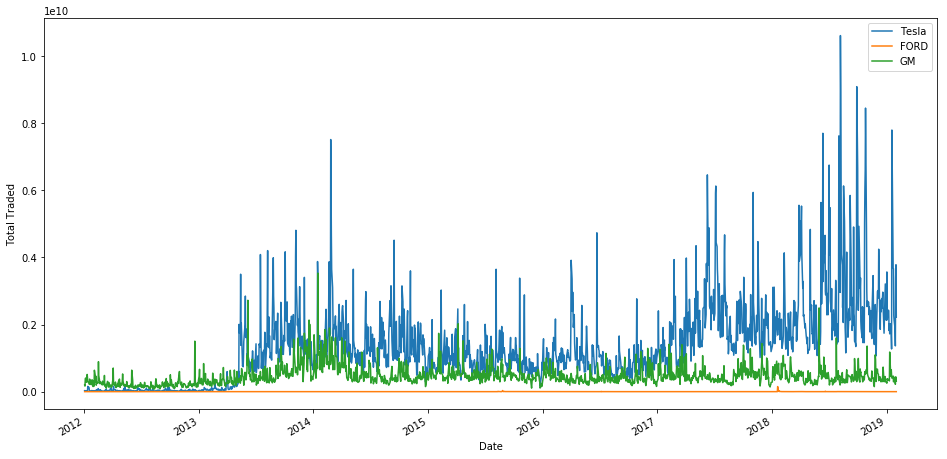

In [18]:
tesla['Total Traded'].plot(label= 'Tesla', figsize=(16,8))
ford['Total Traded'].plot(label= 'FORD')
gm['Total Traded'].plot(label= 'GM')
plt.legend()
plt.ylabel('Total Traded')

** Interesting, looks like there was huge amount of money traded for Tesla somewhere in early 2018. What date was that and what happened? **

In [19]:
tesla['Total Traded'].idxmax()

Timestamp('2018-08-07 00:00:00')

**Tesla shares surge 10% after Elon Musk shocks market with tweet about going private
Tesla shares surged more than 10 percent after being halted for more than an hour.
Musk issued a string of tweets about possibly taking the company private at $420 a share.**

____

** Let's plot out some MA (Moving Averages). Plot out the MA50 and MA200 for GM. **

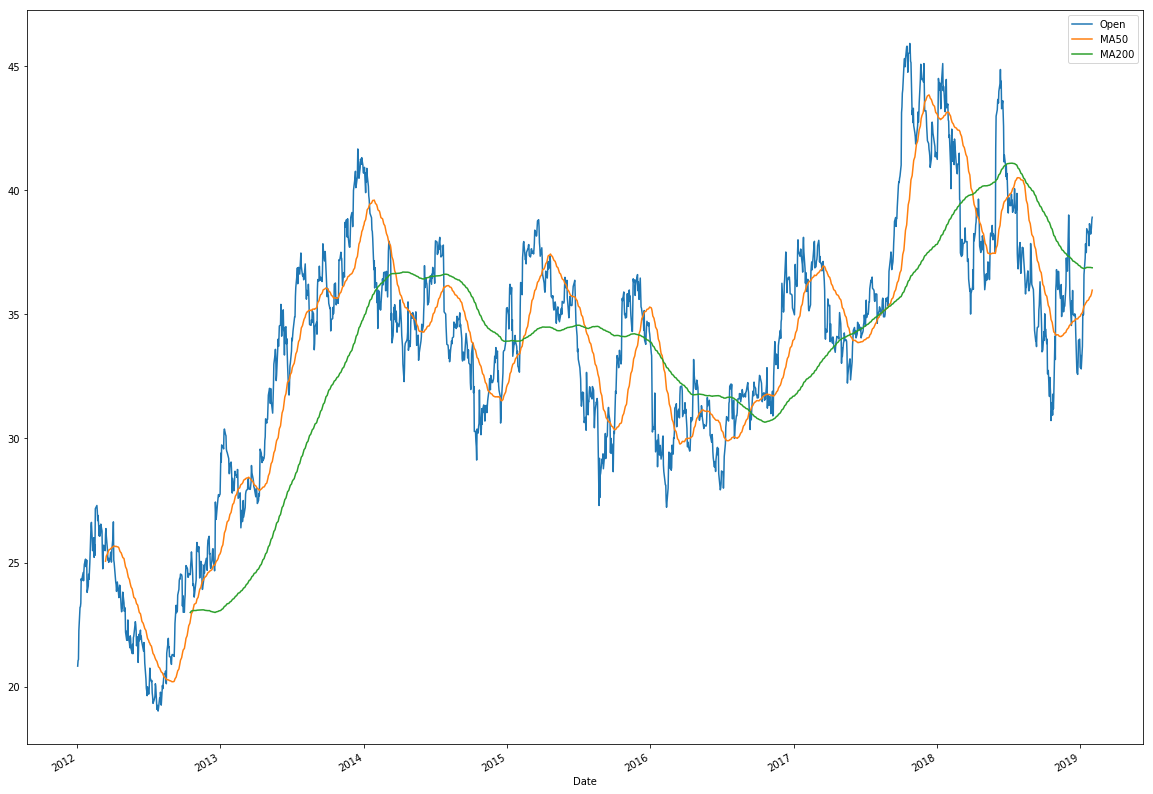

In [20]:
# plttoing moving average of GM
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open', 'MA50', 'MA200']].plot(label='GM', figsize=(20,15));


______

** Check for a relationship between these three equities. Import scatter_matrix from pandas.plotting and use it to create a scatter matrix plot of all the stocks'closing price. Rearrange the columns into a new single dataframe. Info can be found here: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot **

In [21]:
from pandas.plotting import scatter_matrix

In [22]:
car_comp = pd.concat([tesla['Close'], ford['Close'], gm['Close']], axis=1)
car_comp.columns= ['Tesla Close', 'Ford Close', 'GM Close']

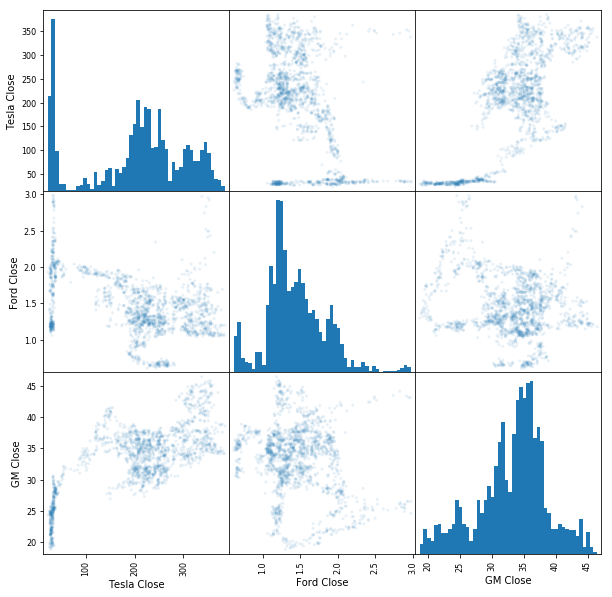

In [23]:
scatter_matrix(car_comp, figsize=(10,10), alpha=0.1, hist_kwds={'bins':50});

_____
### Creating a Candlestick Chart for Ford
** https://matplotlib.org/examples/pylab_examples/finance_demo.html**


In [24]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DateLocator, MONDAY


In [25]:
#getting  a column of dates:
ford_reset = ford.loc['2018-12':'2019-02'].reset_index()
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))



In [26]:
ford_reset.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Total Traded,date_ax
0,2018-12-03,1.45,1.34,1.37,1.44,94000,1.44,128780.000448,737031.0
1,2018-12-04,1.44,1.38,1.44,1.38,136300,1.38,196272.007799,737032.0
2,2018-12-06,1.43,1.35,1.35,1.36,15700,1.36,21195.000374,737034.0
3,2018-12-07,1.43,1.36,1.42,1.42,23500,1.42,33369.998991,737035.0
4,2018-12-10,1.43,1.34,1.43,1.38,17100,1.38,24452.999103,737038.0


In [27]:
list_of_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
ford_values = [tuple(vals) for vals in ford_reset[list_of_cols].values]

In [28]:
ford_values

[(737031.0,
  1.3700000047683716,
  1.4500000476837158,
  1.340000033378601,
  1.440000057220459),
 (737032.0,
  1.440000057220459,
  1.440000057220459,
  1.3799999952316284,
  1.3799999952316284),
 (737034.0,
  1.350000023841858,
  1.4299999475479126,
  1.350000023841858,
  1.3600000143051147),
 (737035.0,
  1.4199999570846558,
  1.4299999475479126,
  1.3600000143051147,
  1.4199999570846558),
 (737038.0,
  1.4299999475479126,
  1.4299999475479126,
  1.340000033378601,
  1.3799999952316284),
 (737039.0,
  1.409999966621399,
  1.4299999475479126,
  1.3799999952316284,
  1.4299999475479126),
 (737040.0,
  1.440000057220459,
  1.440000057220459,
  1.3799999952316284,
  1.409999966621399),
 (737041.0,
  1.4199999570846558,
  1.440000057220459,
  1.399999976158142,
  1.409999966621399),
 (737042.0,
  1.4199999570846558,
  1.4299999475479126,
  1.3799999952316284,
  1.409999966621399),
 (737045.0,
  1.4199999570846558,
  1.4800000190734863,
  1.3899999856948853,
  1.409999966621399),
 (7370

In [29]:
mondays = WeekdayLocator(MONDAY)
alldays = DateLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')


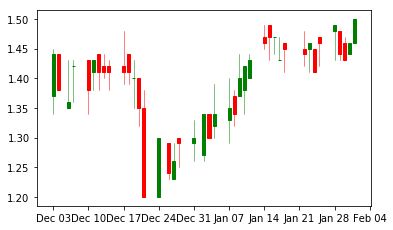

In [30]:
#plot the data
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, ford_values, width = 0.6, colorup='g', colordown='r');


____
## Part 3: Basic Financial Analysis


# Daily Percentage Change


$ r_t = \frac{p_t}{p_{t-1}} -1$

** Calculate return from the Close price column. **

In [31]:
tesla['returns'] = tesla['Close'].pct_change(1)
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

In [32]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,-0.013177
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,-0.021292
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,-0.007743
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,0.012635


In [33]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,1.70,1.65,1.69,1.67,16700,1.67,28223.000956,NaN
2012-01-04,1.71,1.65,1.68,1.66,5600,1.66,9407.999706,-0.005988
2012-01-05,1.69,1.65,1.65,1.67,9200,1.67,15179.999781,0.006024
2012-01-06,1.69,1.66,1.68,1.67,9800,1.67,16463.999486,0.000000
2012-01-09,1.75,1.68,1.72,1.75,34500,1.75,59340.000987,0.047904


In [34]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.818344,1.941627e+08,NaN,NaN,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.898247,1.653835e+08,NaN,NaN,0.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.713190,3.772807e+08,NaN,NaN,0.048227
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,18.312424,4.059000e+08,NaN,NaN,0.033829
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,18.248503,2.803604e+08,NaN,NaN,-0.003490


** Histogram of each companies returns. **

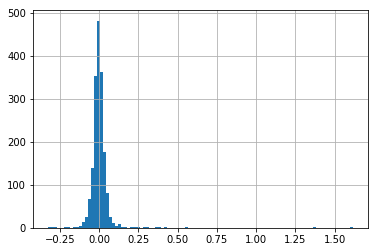

In [35]:
ford['returns'].hist(bins=100);

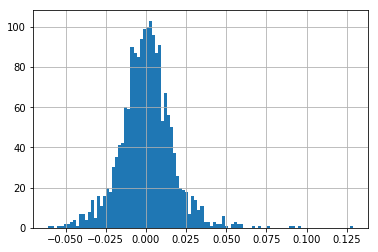

In [36]:
gm['returns'].hist(bins=100);


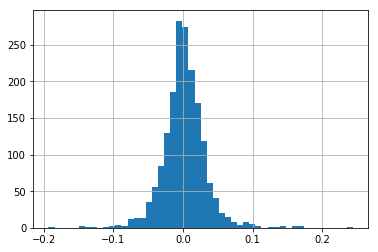

In [37]:
tesla['returns'].hist(bins=50);

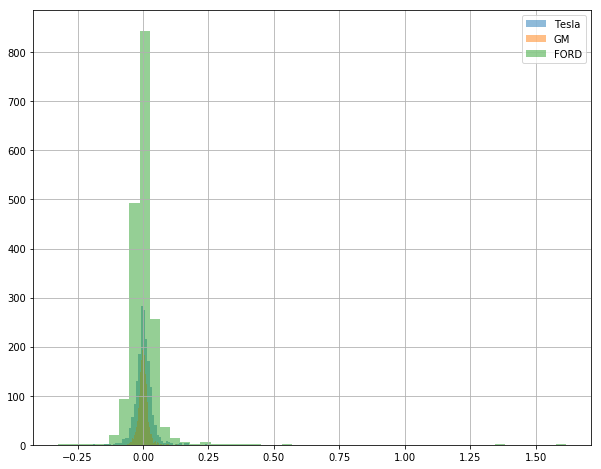

In [38]:
tesla['returns'].hist(bins=50, label='Tesla', figsize = (10,8), alpha = 0.5)
gm['returns'].hist(bins=50, label='GM', alpha = 0.5)
ford['returns'].hist(bins=50, label='FORD', alpha = 0.5)
plt.legend();

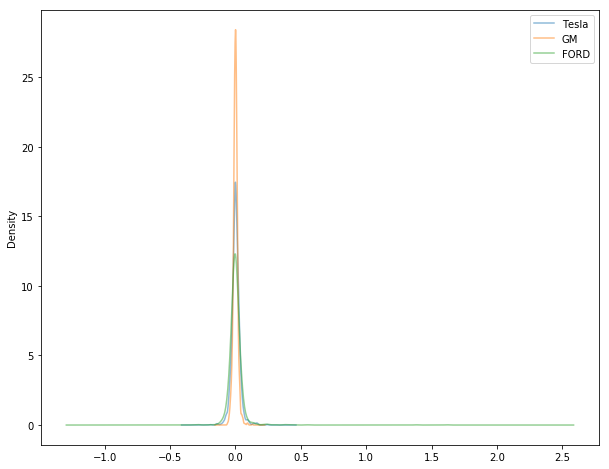

In [39]:
#KDE instead of histograms for another view point
tesla['returns'].plot(kind='kde', label='Tesla', figsize = (10,8), alpha = 0.5)
gm['returns'].plot(kind='kde', label='GM', alpha = 0.5)
ford['returns'].plot(kind='kde', label='FORD', alpha = 0.5)
plt.legend();

** Try also creating some box plots comparing the returns. **

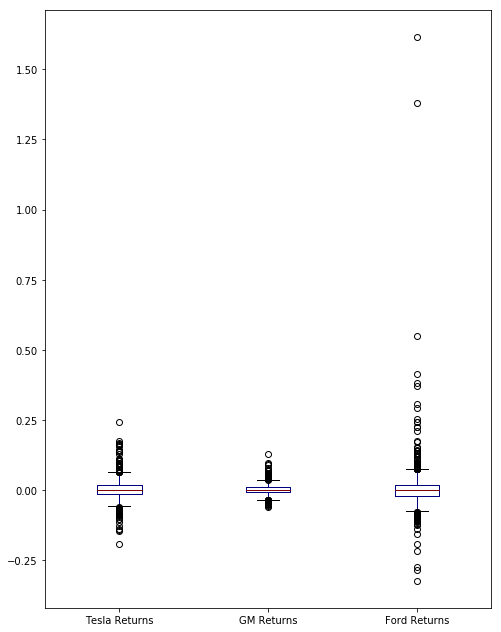

In [40]:
#box plots comparing the returns
box_df = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
box_df.columns = ['Tesla Returns', 'GM Returns', 'Ford Returns']
box_df.plot(kind='box', figsize=(8,11), colormap= 'jet');

## Comparing Daily Returns between Stocks

** Scatter matrix plot to see the correlation between each of the stocks daily returns. **

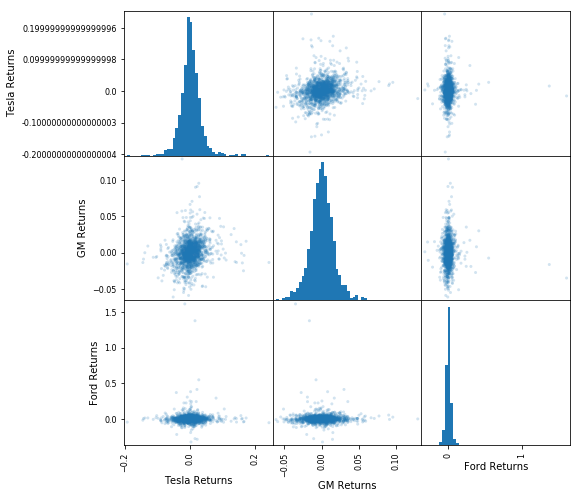

In [41]:
scatter_matrix(box_df, figsize=(8,8), alpha=0.2, hist_kwds={'bins':50});

** It looks like Tesla and GM do have some sort of possible relationship, so plot just these two against eachother in scatter plot **

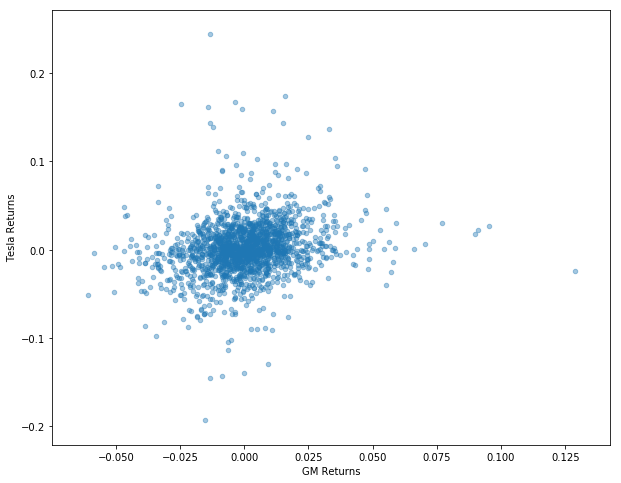

In [42]:
box_df.plot(kind='scatter', x= 'GM Returns', y= 'Tesla Returns', alpha=0.4, figsize=(10,8));

____
## Cumulative Daily Returns

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day.

**Cumulative Return**: Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. 

The formula for a cumulative daily return is:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

In [43]:
#Create a cumulative daily return column for each car company's dataframe.


tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

In [44]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN,NaN
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,-0.013177,0.986823
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,-0.021292,0.965812
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,-0.007743,0.958333
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,0.012635,0.970442


In [45]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2012-01-03,1.70,1.65,1.69,1.67,16700,1.67,28223.000956,NaN,NaN
2012-01-04,1.71,1.65,1.68,1.66,5600,1.66,9407.999706,-0.005988,0.994012
2012-01-05,1.69,1.65,1.65,1.67,9200,1.67,15179.999781,0.006024,1.000000
2012-01-06,1.69,1.66,1.68,1.67,9800,1.67,16463.999486,0.000000,1.000000
2012-01-09,1.75,1.68,1.72,1.75,34500,1.75,59340.000987,0.047904,1.047904


In [46]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.818344,1.941627e+08,NaN,NaN,NaN,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.898247,1.653835e+08,NaN,NaN,0.004751,1.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.713190,3.772807e+08,NaN,NaN,0.048227,1.053207
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,18.312424,4.059000e+08,NaN,NaN,0.033829,1.088836
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,18.248503,2.803604e+08,NaN,NaN,-0.003490,1.085036


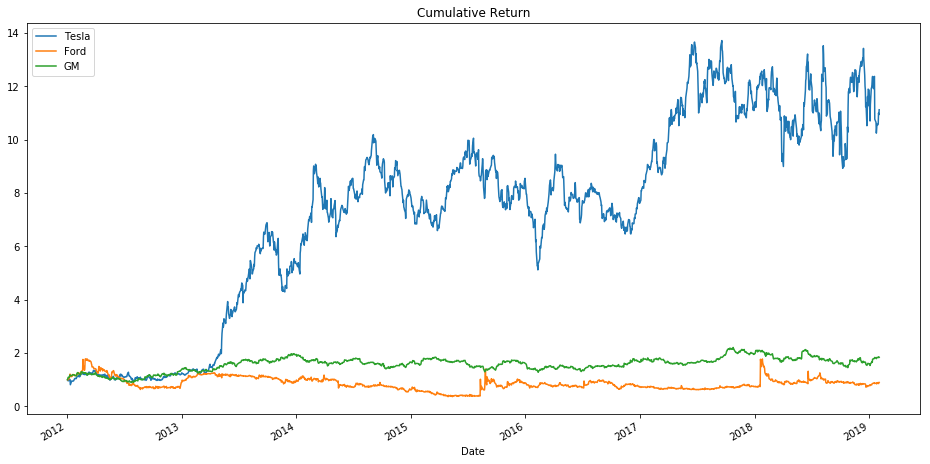

In [47]:
#Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest?

tesla['Cumulative Return'].plot(label='Tesla', figsize=(16,8), title = 'Cumulative Return')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend();